- Chairunisa Az Zahra Arifin
- Oktaviani Nurlinda Sari

Sumber Data: https://www.kaggle.com/datasets/barun2104/telecom-churn?datasetId=567482
Problem: Classification

## Data 2 Customer Churn

## 1) Importing Data

- Read csv data

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("telecom_churn.csv")

## 2) Data Preparation

- Check header, column and shape of data
- Check missing value
- Check column types
- Check outliers

In [3]:
# Part 1: Check header, column and shape of data

In [4]:
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [5]:
df.columns

Index(['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins'],
      dtype='object')

In [6]:
df.shape

(3333, 11)

In [7]:
# Part 2: Checking Missing Value

In [8]:
df.isna().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

In [9]:
# Part 3: Checking Column Types

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


Data type 'int64' berarti kolom tersebut berisi bilangan bulat, tanpa desimal. Sedangkan, data type 'float64' berarti kolom tersebut berisi bilangan desimal. 

Sepertinya dataset kita baik-baik saja. Semua kolom tidak memiliki `missing value` (Jika ada missing value, pasti ada kolom yang tidak tertulis 3333 non-null).

Diketahui semua kolom merupakan kolom `numerik`, sehingga bisa saling dibandingkan.

In [11]:
# Part 4: Checking Outliers


Persebaran data sebelum ditangani Outlier: 
       AccountWeeks      DayMins     DayCalls  MonthlyCharge   OverageFee  \
count   3333.000000  3333.000000  3333.000000    3333.000000  3333.000000   
mean     101.064806   179.775098   100.435644      56.305161    10.051488   
std       39.822106    54.467389    20.069084      16.426032     2.535712   
min        1.000000     0.000000     0.000000      14.000000     0.000000   
25%       74.000000   143.700000    87.000000      45.000000     8.330000   
50%      101.000000   179.400000   101.000000      53.500000    10.070000   
75%      127.000000   216.400000   114.000000      66.200000    11.770000   
max      243.000000   350.800000   165.000000     111.300000    18.190000   

          RoamMins  
count  3333.000000  
mean     10.237294  
std       2.791840  
min       0.000000  
25%       8.500000  
50%      10.300000  
75%      12.100000  
max      20.000000  


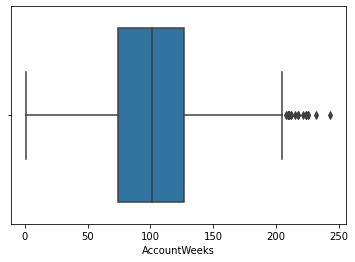

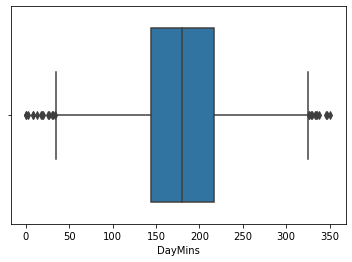

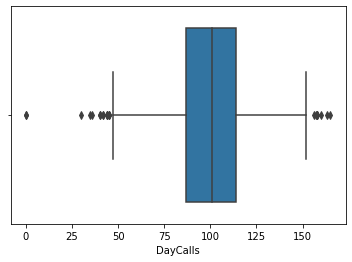

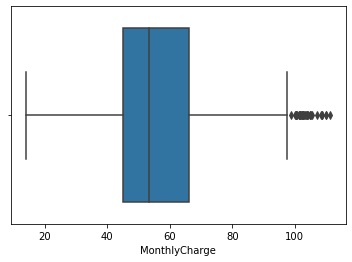

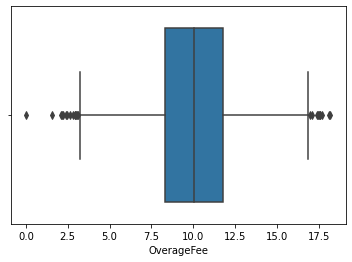

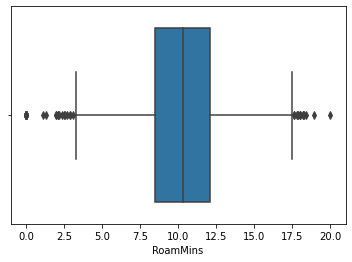

In [12]:
print('\nPersebaran data sebelum ditangani Outlier: ')
print(df[['AccountWeeks', 'DayMins','DayCalls','MonthlyCharge', 'OverageFee','RoamMins']].describe())
# Creating Box Plot
import matplotlib.pyplot as plt
import seaborn as sns
# Masukkan variable
plt.figure() # untuk membuat figure baru
sns.boxplot(x=df['AccountWeeks'])
plt.show()
plt.figure() # untuk membuat figure baru
sns.boxplot(x=df['DayMins'])
plt.show()
plt.figure() # untuk membuat figure baru
sns.boxplot(x=df['DayCalls'])
plt.show()
plt.figure() # untuk membuat figure baru
sns.boxplot(x=df['MonthlyCharge'])
plt.show()
plt.figure() # untuk membuat figure baru
sns.boxplot(x=df['OverageFee'])
plt.show()
plt.figure() # untuk membuat figure baru
sns.boxplot(x=df['RoamMins'])
plt.show()

In [13]:
# Handling with IQR
Q1 = (df[['AccountWeeks','DayMins','DayCalls','MonthlyCharge', 'OverageFee','RoamMins']]).quantile(0.25)
Q3 = (df[['AccountWeeks','DayMins','DayCalls','MonthlyCharge', 'OverageFee','RoamMins']]).quantile(0.75)
IQR = Q3 - Q1
maximum = Q3 + (1.5*IQR)
print('Nilai Maximum dari masing-masing Variable adalah: ')
print(maximum)
minimum = Q1 - (1.5*IQR)
print('\nNilai Minimum dari masing-masing Variable adalah: ')
print(minimum)
more_than = (df > maximum)
lower_than = (df < minimum)
df = df.mask(more_than, maximum, axis=1)
df = df.mask(lower_than, minimum, axis=1)
print('\nPersebaran data setelah ditangani Outlier: ')
print(df[['AccountWeeks','DayMins','DayCalls','MonthlyCharge', 'OverageFee','RoamMins']].describe())

Nilai Maximum dari masing-masing Variable adalah: 
AccountWeeks     206.50
DayMins          325.45
DayCalls         154.50
MonthlyCharge     98.00
OverageFee        16.93
RoamMins          17.50
dtype: float64

Nilai Minimum dari masing-masing Variable adalah: 
AccountWeeks     -5.50
DayMins          34.65
DayCalls         46.50
MonthlyCharge    13.20
OverageFee        3.17
RoamMins          3.10
dtype: float64

Persebaran data setelah ditangani Outlier: 
       AccountWeeks      DayMins     DayCalls  MonthlyCharge   OverageFee  \
count   3333.000000  3333.000000  3333.000000    3333.000000  3333.000000   
mean     101.003300   179.816157   100.473597      56.246655    10.052934   
std       39.644112    54.152190    19.863740      16.263174     2.520271   
min        1.000000    34.650000    46.500000      14.000000     3.170000   
25%       74.000000   143.700000    87.000000      45.000000     8.330000   
50%      101.000000   179.400000   101.000000      53.500000    10.070000   
7

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_22600/3421456545.py:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  more_than = (df > maximum)
C:\Users\Lenovo\AppData\Local\Temp/ipykernel_22600/3421456545.py:12: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  lower_than = (df < minimum)


Kemudian nilai outlier tersebut ditangani dengan cara merubah nilainya ke nilai Maximum & Minimum dari interquartile range (IQR). Setelah di tangani outliernya, dan dilihat perseberan data nya, terlihat sudah tidak ada lagi nilai yang outlier.

## 3) Future Engineering

- X-Y Split
- Train Test Split

In [14]:
# Part 1: X-Y Split

In [15]:
feature = ['AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage', 'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins']

In [16]:
y = df['Churn']
x = df[['AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage', 'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins']]

In [17]:
row = [0 for x in range(0,2)]
row[0] = y.shape
row[1] = x.shape
row

[(3333,), (3333, 10)]

In [18]:
# Part 2: Train Test Split

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
# defining feature matrix(X) and response vector(y)
X = df.loc[:, df.columns != 'Churn']
y = df["Churn"]

In [21]:
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=1)

In [22]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1999, 10) (1334, 10) (1999,) (1334,)


## 4) Exploratory Data Analysis

- Check distribution for each feature
- Check the proportion of 0 and 1 in Churn label
- Check data composition in train and test data

In [23]:
# Part 1: Check distribution for each feature

In [24]:
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline
import pandas as pd
import scipy.stats as stats
import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols  
import matplotlib.pyplot as plt
import numpy as np

In [25]:
data_eda = X_train.join(y_train, how='outer')
data_eda.head()

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,Churn
1210,48.0,1,0,0.2,1,275.2,67.0,65.0,9.01,7.9,0
441,99.0,1,0,0.0,0,155.3,93.0,49.0,13.29,12.4,0
3052,103.0,1,0,0.0,2,129.3,103.0,40.0,10.14,12.9,0
1827,95.0,1,0,0.0,2,167.6,96.0,44.0,8.80,13.4,0
689,71.0,1,0,0.0,1,277.5,104.0,59.0,6.59,8.2,0


In [26]:
col_num = list(X_train[feature])

In [27]:
df_num=data_eda[col_num+['Churn']]
for col in col_num:
    try:
        df_num[col]=df_num[col].astype(float)
    except:
        print(col)

In [28]:
df_num[col] = df_num[col].apply(pd.to_numeric, downcast='float', errors='coerce')

In [29]:
for col in col_num:
#     df_num[col]=df_num[col].fillna(np.median(df_num[~(df_num[col].isna())][col]))
    df_num[col]=df_num[col].fillna(0)

In [30]:
for col in col_num:
    df2=df_num[[col,'Churn']]
    res=stats.f_oneway(df2[df2.Churn==1][col],
                   df2[df2.Churn==0][col])
    print(res)

F_onewayResult(statistic=1.0755365325768425, pvalue=0.29982377094396895)
F_onewayResult(statistic=131.68763435711486, pvalue=1.447018431272085e-29)
F_onewayResult(statistic=21.459043565794847, pvalue=3.847765840045636e-06)
F_onewayResult(statistic=17.105551539431133, pvalue=3.682398716223948e-05)
F_onewayResult(statistic=114.62708765600594, pvalue=4.762718238948339e-26)
F_onewayResult(statistic=97.82157422043045, pvalue=1.4959110946849991e-22)
F_onewayResult(statistic=0.8689212998342508, pvalue=0.35136679182149244)
F_onewayResult(statistic=9.556569023308477, pvalue=0.0020198712260226935)
F_onewayResult(statistic=10.766395709552482, pvalue=0.0010513991133399056)
F_onewayResult(statistic=4.911178922884725, pvalue=0.0267957703115196)


In [31]:
# Part 2: Check the proportion of 0 and 1 in Churn label

In [32]:
df["Churn"].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


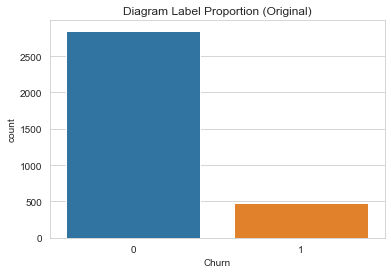

In [33]:
import seaborn as sns
sns.countplot(df["Churn"])

plt.title('Diagram Label Proportion (Original)')
plt.show() 

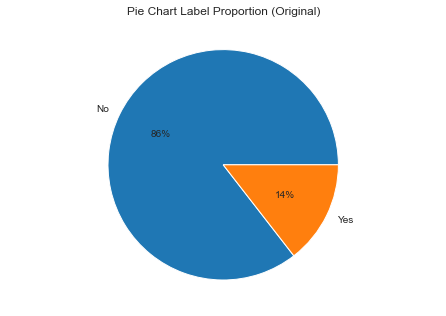

In [34]:
fig = plt.figure() 
ax = fig.add_axes([0,0,1,1]) 
ax.axis('equal') 
labels = ['No','Yes'] 
churn = df.Churn.value_counts() 
ax.pie(churn, labels=labels, autopct='%.0f%%')

plt.title('Pie Chart Label Proportion (Original)')
plt.show() 

Berdasarkan pie chart di atas, dapat disimpulkan bahwa sebaran data secara mayoritas customer tidak melakukan Churn, dengan detail Churn sebanyak 14% dan No Churn sebanyak 86%.

In [35]:
# Part 3: Check data composition in train and test data

In [36]:
data_train = X_train.join(y_train, how='outer')
data_test = X_test.join(y_test, how='outer')

Class 0: 1714
Class 1: 285
Proportion: 6.01 : 1


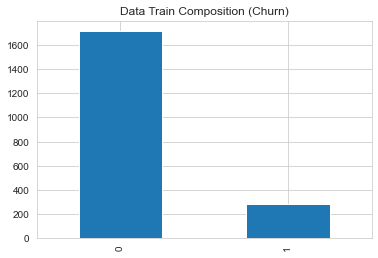

In [37]:
import numpy as np
import pandas as pd

target_count = data_train.Churn.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Data Train Composition (Churn)');

Class 0: 1136
Class 1: 198
Proportion: 5.74 : 1


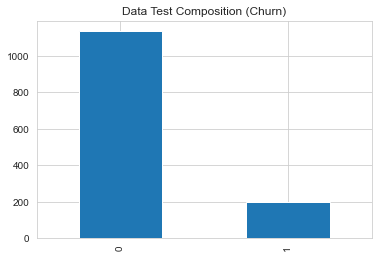

In [38]:
import numpy as np
import pandas as pd

target_count = data_test.Churn.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Data Test Composition (Churn)');

### Handling the imbalanced class distribution

Data diketahui imbalance, how to handle? kami menggunakan teknik resampling `oversampling`

In [39]:
from sklearn.utils import resample

#create two different dataframe of majority and minority class 
df_majority = df[(df['Churn']==0)] 
df_minority = df[(df['Churn']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 2850, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [40]:
# Part 2: Train Test Split

In [41]:
# defining feature matrix(X) and response vector(y)
X2 = df_upsampled.loc[:, df.columns != 'Churn']
y2 = df_upsampled["Churn"]

In [42]:
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.4,
                                                    random_state=1)

In [43]:
print(X2_train.shape, X2_test.shape, y2_train.shape, y2_test.shape)

(3420, 10) (2280, 10) (3420,) (2280,)


In [44]:
df_upsampled["Churn"].value_counts()

1    2850
0    2850
Name: Churn, dtype: int64

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


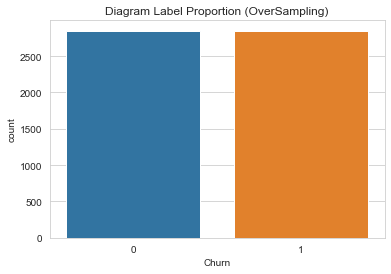

In [45]:
sns.countplot(df_upsampled["Churn"])

plt.title('Diagram Label Proportion (OverSampling)')
plt.show() 

Berdasarkan diagram di atas, dapat disimpulkan bahwa sebaran data customer yang tidak melakukan Churn dengan yang Churn sudah balance setelah dilakukan oversampling.

## 5) Building Model

- Import all package & create function for modelling
- Model performance in data train
- Model performance in data test
- Evaluate model through test data

In [46]:
from sklearn.metrics import confusion_matrix, classification_report

### 5.1 Model machine learning yang akan digunakan yaitu Logistic Regression.

In [47]:
# Part 1: Import all package & create function for modelling

In [48]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression().fit(X2_train, y2_train) 
print('Model Logistic Regression yang terbentuk adalah: \n',log_model)

Model Logistic Regression yang terbentuk adalah: 
 LogisticRegression()


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
# Part 2: Model performance in data train 

In [50]:
# Menampilkan hasil training dengan confusion matrix
from sklearn.metrics import classification_report
# Predict
y2_train_pred = log_model.predict(X2_train)
# Print classification report 
print('Classification Report Training Model (Logistic Regression) :')
print(classification_report(y2_train, y2_train_pred))

Classification Report Training Model (Logistic Regression) :
              precision    recall  f1-score   support

           0       0.75      0.76      0.75      1713
           1       0.75      0.75      0.75      1707

    accuracy                           0.75      3420
   macro avg       0.75      0.75      0.75      3420
weighted avg       0.75      0.75      0.75      3420



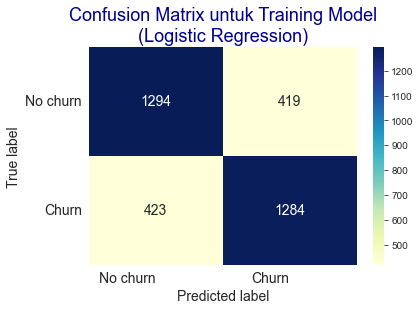

In [51]:
# Menampilkan hasil training model dengan visualisasi heatmap dari confusion matrix 
confusion_matrix_df = pd.DataFrame((confusion_matrix(y2_train, y2_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix untuk Training Model\n(Logistic Regression)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

Dari data training dapat dilihat bahwa model mampu memprediksi data dengan tingkat akurasi `sebesar 75%`, dengan detail prediksi Churn yang sebenarnya Churn adalah 1284, prediksi tidak Churn yang sebenarnya tidak Churn adalah 1294, prediksi tidak Churn yang sebenarnya Churn adalah 423 dan prediksi churn yang sebenarnya tidak churn adalah 419.

In [52]:
# Part 3: Model performance in data test

In [53]:
# Menampilkan hasil testing model dengan confusion matrix
# Predict
y2_test_pred = log_model.predict(X2_test)
# Print classification report
print('Classification Report Testing Model (Logistic Regression):')
print(classification_report(y2_test, y2_test_pred))

Classification Report Testing Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.75      0.76      0.75      1137
           1       0.76      0.75      0.75      1143

    accuracy                           0.75      2280
   macro avg       0.75      0.75      0.75      2280
weighted avg       0.75      0.75      0.75      2280



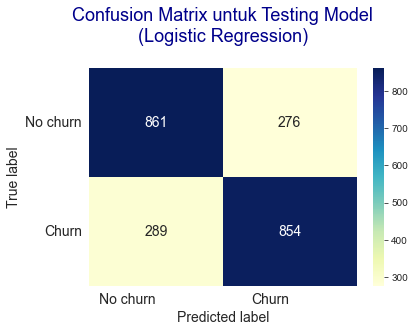

In [54]:
# Menampilkan hasil testing model dengan visualisasi heatmap dari confusion matrix 
confusion_matrix_df = pd.DataFrame((confusion_matrix(y2_test, y2_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix untuk Testing Model\n(Logistic Regression)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

Dari data testing dapat dilihat bahwa model mampu memprediksi data dengan tingkat akurasi `sebesar 75%`, dengan detail prediksi Churn yang sebenarnya churn adalah 854, prediksi tidak Churn yang sebenarnya tidak Churn adalah 861, prediksi tidak churn yang sebenarnya Churn adalah 289 dan prediksi Churn yang sebenarnya tidak Churn adalah 276.

### 5.2 Model machine learning yang akan digunakan yaitu Decision Tree.

In [55]:
# Part 1: Import all package & create function for modelling

In [56]:
from sklearn import tree
# import pydotplus
# import matplotlib.pyplot as plt
# import matplotlib.image as pltimg

dtree = tree.DecisionTreeClassifier()
dtree = dtree.fit(X2_train, y2_train)
y2_dtree = dtree.predict(X2_test)

In [57]:
text_representation = tree.export_text(dtree)
print(text_representation)

|--- feature_5 <= 236.15
|   |--- feature_4 <= 3.50
|   |   |--- feature_1 <= 0.50
|   |   |   |--- feature_9 <= 13.10
|   |   |   |   |--- feature_3 <= 3.24
|   |   |   |   |   |--- feature_6 <= 134.50
|   |   |   |   |   |   |--- feature_5 <= 233.80
|   |   |   |   |   |   |   |--- feature_0 <= 35.00
|   |   |   |   |   |   |   |   |--- feature_3 <= 0.27
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_3 >  0.27
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_0 >  35.00
|   |   |   |   |   |   |   |   |--- feature_9 <= 10.05
|   |   |   |   |   |   |   |   |   |--- feature_3 <= 2.13
|   |   |   |   |   |   |   |   |   |   |--- feature_6 <= 60.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- feature_6 >  60.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 8
|   |   |   |   |   |   |   |   |   |--- feature_3 >  2.

In [58]:
# Part 2: Model performance in data test

In [59]:
#Menampilkan hasil testing model dengan confusion matrix
from sklearn.metrics import classification_report
print(classification_report(y2_test, y2_dtree))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      1137
           1       0.93      0.99      0.96      1143

    accuracy                           0.96      2280
   macro avg       0.96      0.96      0.96      2280
weighted avg       0.96      0.96      0.96      2280



In [60]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y2_test, y2_dtree))

[[1058   79]
 [  16 1127]]


Dari data testing dapat dilihat bahwa model mampu memprediksi data dengan tingkat akurasi `sebesar 96%`, dengan detail prediksi Churn yang sebenarnya churn adalah 1127, prediksi tidak Churn yang sebenarnya tidak Churn adalah 1058, prediksi tidak churn yang sebenarnya Churn adalah 16 dan prediksi Churn yang sebenarnya tidak Churn adalah 79.

### 5.3 Model machine learning yang akan digunakan yaitu Random Forest.

In [61]:
# Part 1: Import all package & create function for modelling

In [62]:
from sklearn.ensemble import RandomForestClassifier
#Latih model dengan RandomForestClassifier()
rdf_model = RandomForestClassifier().fit(X2_train, y2_train)
print(rdf_model)

RandomForestClassifier()


In [63]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

classifier_rf.fit(X2_train, y2_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [64]:
# Part 2: Model performance in data train 

In [65]:
# Menampilkan hasil training dengan confusion matrix

from sklearn.metrics import classification_report
# Predict
y2_train_pred = rdf_model.predict(X2_train)
# Print classification report 
print('Classification Report Training Model (Random Forest) :')
print(classification_report(y2_train, y2_train_pred))

Classification Report Training Model (Random Forest) :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1713
           1       1.00      1.00      1.00      1707

    accuracy                           1.00      3420
   macro avg       1.00      1.00      1.00      3420
weighted avg       1.00      1.00      1.00      3420



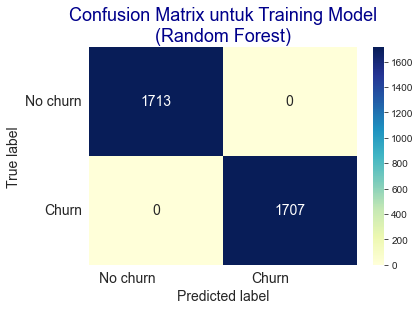

In [66]:
from sklearn.metrics import confusion_matrix, classification_report

# Menampilkan hasil training model dengan visualisasi heatmap dari confusion matrix 
confusion_matrix_df = pd.DataFrame((confusion_matrix(y2_train, y2_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix untuk Training Model\n(Random Forest)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

Dari data training dapat dilihat bahwa model mampu memprediksi data dengan tingkat akurasi `sempurna 100%`, dengan detail prediksi Churn yang sebenarnya Churn adalah 1707, prediksi tidak Churn yang sebenarnya tidak Churn adalah 1713, prediksi tidak Churn yang sebenarnya Churn adalah 0 dan prediksi churn yang sebenarnya tidak churn adalah 0.

In [67]:
# Part 3: Model performance in data test

In [68]:
# Menampilkan hasil testing model dengan confusion matrix
# Predict
y2_test_pred = rdf_model.predict(X2_test)
# Print classification report
print('Classification Report Testing Model (Random Forest):')
print(classification_report(y2_test, y2_test_pred))

Classification Report Testing Model (Random Forest):
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      1137
           1       0.95      0.99      0.97      1143

    accuracy                           0.97      2280
   macro avg       0.97      0.97      0.97      2280
weighted avg       0.97      0.97      0.97      2280



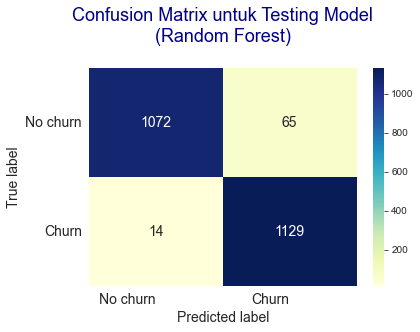

In [69]:
# Menampilkan hasil testing model dengan visualisasi heatmap dari confusion matrix 
confusion_matrix_df = pd.DataFrame((confusion_matrix(y2_test, y2_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix untuk Testing Model\n(Random Forest)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

Dari data training dapat dilihat bahwa model mampu memprediksi data dengan tingkat akurasi `sebesar 97%`, dengan detail prediksi Churn yang sebenarnya Churn adalah 1129, prediksi tidak Churn yang sebenarnya tidak Churn adalah 1072, prediksi tidak Churn yang sebenarnya Churn adalah 14 dan prediksi churn yang sebenarnya tidak churn adalah 65.

### 5.4 Model machine learning yang akan digunakan yaitu XGBoost.

In [70]:
# Part 1: Import all package & create function for modelling

In [71]:
from sklearn.ensemble import GradientBoostingClassifier
#Latih model dengan GradientBoostingClassifier()
gbt_model = GradientBoostingClassifier().fit(X2_train, y2_train)
print(gbt_model)

GradientBoostingClassifier()


In [72]:
# Part 2: Model performance in data traim

In [73]:
# Menampilkan hasil training dengan confusion matrix
from sklearn.metrics import classification_report
# Predict
y2_train_pred = gbt_model.predict(X2_train)
# Print classification report 
print('Classification Report Training Model (Gradien Boosting) :')
print(classification_report(y2_train, y2_train_pred))

Classification Report Training Model (Gradien Boosting) :
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      1713
           1       0.93      0.89      0.91      1707

    accuracy                           0.91      3420
   macro avg       0.91      0.91      0.91      3420
weighted avg       0.91      0.91      0.91      3420



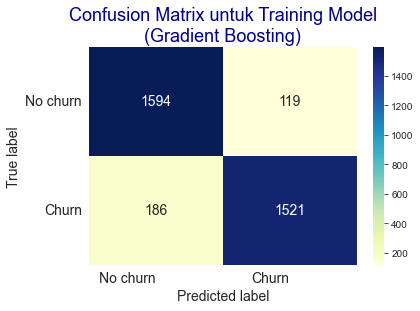

In [74]:
# Menampilkan hasil training model dengan visualisasi heatmap dari confusion matrix 
confusion_matrix_df = pd.DataFrame((confusion_matrix(y2_train, y2_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix untuk Training Model\n(Gradient Boosting)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

Dari data training dapat dilihat bahwa model mampu memprediksi data dengan tingkat akurasi `sebesar 91%`, dengan detail prediksi Churn yang sebenarnya Churn adalah 1521, prediksi tidak Churn yang sebenarnya tidak Churn adalah 1594, prediksi tidak Churn yang sebenarnya Churn adalah 186 dan prediksi churn yang sebenarnya tidak churn adalah 119.

In [75]:
# Part 3: Model performance in data test

In [76]:
# Menampilkan hasil testing model dengan confusion matrix
# Predict
y2_test_pred = gbt_model.predict(X2_test) 
# Print classification report 
print('Classification Report Testing Model (Gradient Boosting):')
print(classification_report(y2_test, y2_test_pred))

Classification Report Testing Model (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1137
           1       0.89      0.89      0.89      1143

    accuracy                           0.89      2280
   macro avg       0.89      0.89      0.89      2280
weighted avg       0.89      0.89      0.89      2280



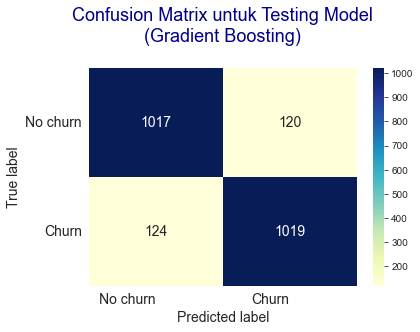

In [77]:
# Menampilkan hasil testing model dengan visualisasi heatmap dari confusion matrix 
confusion_matrix_df = pd.DataFrame((confusion_matrix(y2_test, y2_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix untuk Testing Model\n(Gradient Boosting)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

Dari data training dapat dilihat bahwa model mampu memprediksi data dengan tingkat akurasi `sebesar 89%`, dengan detail prediksi Churn yang sebenarnya Churn adalah 1019, prediksi tidak Churn yang sebenarnya tidak Churn adalah 1017, prediksi tidak Churn yang sebenarnya Churn adalah 124 dan prediksi churn yang sebenarnya tidak churn adalah 120.

## 6) Hyperparameter Tuning

In [78]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [79]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
print(rf.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [80]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [81]:
params = {
    'max_depth': [2,3,5,10,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42],
    'min_samples_leaf': [1,5,10,15],
    'n_estimators': [20,30,50,100,200,300],
    'bootstrap' : [True, False]
}

In [82]:
from sklearn.model_selection import GridSearchCV

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X2_train, y2_train)

Fitting 4 folds for each of 1392 candidates, totalling 5568 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [2, 3, 5, 10, 18, 19, 20, 21, 22, 23, 24,
                                       25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
                                       35, 36, 37, 38, 39, 40, 41, 42],
                         'min_samples_leaf': [1, 5, 10, 15],
                         'n_estimators': [20, 30, 50, 100, 200, 300]},
             scoring='accuracy', verbose=1)

In [83]:
grid_search.best_score_

0.9695906432748538

In [94]:
rf_best = grid_search.best_estimator_
rf_best.fit(X2_train, y2_train)

RandomForestClassifier(bootstrap=False, max_depth=24, n_estimators=20,
                       random_state=42)

In [95]:
rf.fit(X2_train, y2_train)

RandomForestClassifier(random_state=42)

## 7) Evaluation Model

In [96]:
y2_log_model = log_model.predict(X2_test)
y2_dtree = dtree.predict(X2_test)
y2_rf = rf_best.predict(X2_test)
y2_gbt_model = gbt_model.predict(X2_test)

In [97]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y2_test, y2_log_model))
print(accuracy_score(y2_test, y2_dtree))
print(accuracy_score(y2_test, y2_rf))
print(accuracy_score(y2_test, y2_gbt_model))

0.7521929824561403
0.9583333333333334
0.9754385964912281
0.8929824561403509


In [98]:
from sklearn.metrics import precision_score
print(precision_score(y2_test, y2_log_model, average='macro'))
print(precision_score(y2_test, y2_dtree, average='macro'))
print(precision_score(y2_test, y2_rf, average='macro'))
print(precision_score(y2_test, y2_gbt_model, average='macro'))

0.7522239322816469
0.9597983082724182
0.9756384841894571
0.8929839127300037


In [99]:
from sklearn.metrics import recall_score
print(recall_score(y2_test, y2_log_model, average='macro'))
print(recall_score(y2_test, y2_dtree, average='macro'))
print(recall_score(y2_test, y2_rf, average='macro'))
print(recall_score(y2_test, y2_gbt_model, average='macro'))

0.7522062710498918
0.9582603295960037
0.9754130337929394
0.8929863318536371


In [100]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y2_test, y2_log_model))
print(confusion_matrix(y2_test, y2_dtree))
print(confusion_matrix(y2_test, y2_rf))
print(confusion_matrix(y2_test, y2_gbt_model))

[[861 276]
 [289 854]]
[[1058   79]
 [  16 1127]]
[[1098   39]
 [  17 1126]]
[[1017  120]
 [ 124 1019]]


In [101]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y2_test, y2_log_model, pos_label=1) # pos_label: positive label
print(auc(fpr, tpr))
fpr, tpr, thresholds = roc_curve(y2_test, y2_dtree, pos_label=1) # pos_label: positive label
print(auc(fpr, tpr))
fpr, tpr, thresholds = roc_curve(y2_test, y2_rf, pos_label=1) # pos_label: positive label
print(auc(fpr, tpr))
fpr, tpr, thresholds = roc_curve(y2_test, y2_gbt_model, pos_label=1) # pos_label: positive label
print(auc(fpr, tpr))

0.7522062710498919
0.9582603295960037
0.9754130337929395
0.8929863318536371


In [102]:
from sklearn.metrics import classification_report
print(classification_report(y2_test, y2_log_model))
print(classification_report(y2_test, y2_dtree))
print(classification_report(y2_test, y2_rf))
print(classification_report(y2_test, y2_gbt_model))

              precision    recall  f1-score   support

           0       0.75      0.76      0.75      1137
           1       0.76      0.75      0.75      1143

    accuracy                           0.75      2280
   macro avg       0.75      0.75      0.75      2280
weighted avg       0.75      0.75      0.75      2280

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      1137
           1       0.93      0.99      0.96      1143

    accuracy                           0.96      2280
   macro avg       0.96      0.96      0.96      2280
weighted avg       0.96      0.96      0.96      2280

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1137
           1       0.97      0.99      0.98      1143

    accuracy                           0.98      2280
   macro avg       0.98      0.98      0.98      2280
weighted avg       0.98      0.98      0.98      2280

              preci

## Comparison before and after handling imbalance

Pada awalnya model `Overfitting`  karena problem imbalance, the model is more biased towards majority class. We apply imbalanced data handling techniques, we use resampling `Oversampling`. We see their accuracy and recall results, the recall value of minority class has also improved. This is a good model compared to the previous one. Recall is great.

In [ ]:
# Before OverSampling, counts of label churn '1': [483]
# Before OverSampling, counts of label churn '0': [2850]

# Before OverSampling, the shape of train_X: (1999, 10)
# Before OverSampling, the shape of train_y: (1999,)

# After OverSampling, counts of label '1': [2850]
# After OverSampling, counts of label '0': [2850]

# After OverSampling, the shape of train_X: (3420, 10)
# After OverSampling, the shape of train_y: (3420,)

Conclusion: 
Model yang baik adalah model yang mampu memberikan performa bagus di fase training dan testing model. Sehingga dapat disimpulkan model yang terbaik dari keempat model di atas adalah model dengan metode `Random Forest`.